# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable


##Challenge: Attracting Population to Green Spaces in Metropolitan Areas
##Team: NextEpoch

## Authors
Write the name (first and last) of the people on your team that are responsible for developing this solution.

## External links and resources
Paste here all the links to external resources that are necessary to understand and run your code. Add descriptions to make it clear how to use them during evaluation.

https://www.mdpi.com/2076-3298/5/2/23/htm

https://www.researchgate.net/publication/311202612_Quantifying_the_City's_Green_Area_Potential_Gain_Using_Remote_Sensing_Data

https://www.researchgate.net/publication/321189348_Assessing_how_green_space_types_affect_ecosystem_services_delivery_in_Porto_Portugal

http://kth.diva-portal.org/smash/get/diva2:1342024/FULLTEXT01.pdf

https://www.footprint-ecology.co.uk/reports/Liley%20et%20al.%20-%202006%20-%20The%20quality%20of%20green%20space%20features%20that%20attrac.pdf

## Introduction
Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

###**Challenge Goals :**
Attracting people to green spaces in metropolitan areas is one of the most recent
challenges for big cities. Encouraging people to spend more time in green spaces is one of
the priority goals of municipal governments.
It is fundamental to understand how various dimensions are linked to the search for green
space in large Metropolitan Areas, such as in the metropolitan area of Porto and Lisbon.
How can socio-demographic dimensions, tourist attraction, and people’s mobility level
non-resident in the influence area of the green spaces explain the demand for these
spaces?

###**Outcome**
The challenge is composed of two outcomes:
1. Create a model that predicts the daily average demand of a green space and which
factors contribute the most to the prediction—example of these factors:
socio-demographic, touristic attraction points, mobility and others.
2. Based on the previous outcome, suggest action points that can be taken by the city
hall to increase the usage of the green spaces in the city.



###**About the data**
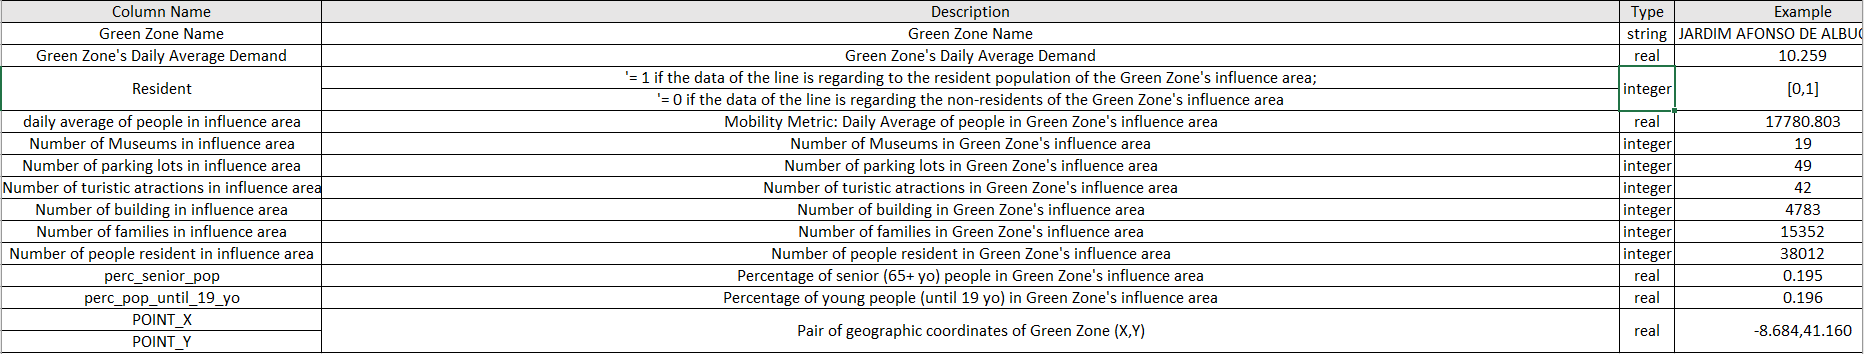

####**Green Spaces Visitation**
This dataset provides the number of visitors (in absolute numbers) to green spaces, inside
and outside of their influence area in the Metropolitan Area of Lisbon and Porto.
The influence area of a green space corresponds to the average of the maximum distances
from the point of origin of its daily users.

## Development
Start coding here! 👩‍💻

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

### Importing Modules and data

In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-a_fh3zm7
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-a_fh3zm

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd # To work with geopandas data
from shapely.geometry import Point # For Data visualization
import matplotlib
import matplotlib.pyplot as plt  # For data visualization
import folium                    # For data visualization
import plotly_express as px
from sklearn.cluster import KMeans # For clustering
from matplotlib.pyplot import figure  # For data visualization
from string import ascii_letters      
import seaborn as sns    # For generating correlation Matrix

In [ ]:
green_areas = pd.read_csv('https://raw.githubusercontent.com/SowmyaMadala/WDL-Stage4/main/Data/Attracting%20Population/WDL_Green_Areas_Dataset_V1.txt' ,sep ="|", encoding ="latin-1").rename(columns = {'Number of Museums in influence area' : 'no_of_museums',
                                                                                                                                  'Number of parking lots in influence area' : 'no_of_parking_lots',
                                                                                                                                   'Number of tourist attractions in influence area': 'no_of_tourist_attractions', 
                                                                                                                                   'Green Zones Daily Average Demand':'gz_daily_avg_demand',
                                                                                                                                    'Daily average of people in influence area': 'daily_avg_people',
                                                                                                                                    'Number of buildings in influence area' : 'no_of_buildings',
       'Number of families in influence area': 'no_of_families',
       'Number of people resident in influence area' : 'no_of_people_resident'
                                                                                                                                    })
green_areas.head()

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,Resident,daily_avg_people,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,1,17780.803014,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001
1,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,0,45787.629298,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001
2,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,0,42877.741202,1775,17185,41163,0.161747,0.204917,-9.19949,38.69674
3,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,1,17497.825376,1775,17185,41163,0.161747,0.204917,-9.19949,38.69674
4,JARDIM ALAMEDA CIDADE UNIVERSITÁRIA,8,23,4,47.347816,0,42877.741202,1775,17185,41163,0.161747,0.204917,-9.15757,38.75294


###**EDA**

In [ ]:
green_areas.columns

Index(['Green_Zone_name', 'no_of_museums', 'no_of_parking_lots',
       'no_of_tourist_attractions', 'gz_daily_avg_demand', 'Resident',
       'daily_avg_people', 'no_of_buildings', 'no_of_families',
       'no_of_people_resident', 'perc_senior_pop', 'perc_pop_until_19_yo',
       'POINT_X', 'POINT_Y'],
      dtype='object')

In [ ]:
green_areas.shape

(128, 14)

In [ ]:
green_areas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Green_Zone_name            128 non-null    object 
 1   no_of_museums              128 non-null    int64  
 2   no_of_parking_lots         128 non-null    int64  
 3   no_of_tourist_attractions  128 non-null    int64  
 4   gz_daily_avg_demand        128 non-null    float64
 5   Resident                   128 non-null    int64  
 6   daily_avg_people           128 non-null    float64
 7   no_of_buildings            128 non-null    int64  
 8   no_of_families             128 non-null    int64  
 9   no_of_people_resident      128 non-null    int64  
 10  perc_senior_pop            128 non-null    float64
 11  perc_pop_until_19_yo       128 non-null    float64
 12  POINT_X                    128 non-null    float64
 13  POINT_Y                    128 non-null    float64

In [ ]:
green_areas.describe()

,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,Resident,daily_avg_people,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,42.093750,58.640625,34.562500,193.392121,0.500000,26719.177597,3626.343750,15653.734375,37741.187500,0.193813,0.192354,-9.049866,39.234297
std,43.297804,64.509138,40.355848,465.213133,0.501965,19261.974531,2183.034349,7094.396956,17294.631008,0.056171,0.031869,0.219416,0.975449
min,0.000000,0.000000,0.000000,1.495627,0.000000,250.571925,1553.000000,1893.000000,4663.000000,0.099891,0.149062,-9.229810,38.696740
25%,2.000000,5.750000,1.750000,10.051912,0.000000,13482.034604,1775.000000,10994.000000,24265.000000,0.161672,0.163131,-9.163505,38.730555
50%,20.000000,30.500000,14.000000,38.086393,0.500000,22274.016565,2811.000000,16735.000000,38057.000000,0.161747,0.197283,-9.150185,38.745940
75%,91.250000,96.250000,62.250000,160.317847,1.000000,36893.356166,4844.250000,19277.250000,45380.750000,0.242176,0.204917,-9.135722,38.795822
max,111.000000,234.000000,203.000000,3193.372906,1.000000,94809.514222,9811.000000,36985.000000,90176.000000,0.295239,0.260294,-8.578620,41.182370


In [ ]:
len(set(green_areas['Green_Zone_name']))

64

In [ ]:
green_areas['Green_Zone_name'].value_counts()

PARQUE URBANO DA QUINTA DA GRANJA      2
JARDIM AVELAR BROTERO                  2
JARDIM DO PALÁCIO DA BOLSA             2
JARDIM DO CAMPO PEQUENO                2
JARDIM ALAMEDA CIDADE UNIVERSITÁRIA    2
                                      ..
JARDIM PROF. ANTÓNIO SOUSA FRANCO      2
PQ. INFANTIL AV. MARQUÊS DE TOMAR      2
PARQUE URBANO DO SILVADO               2
PARQUE EDUARDO VII                     2
PQ. INFA. JARDIM GOMES DE AMORIM       2
Name: Green_Zone_name, Length: 64, dtype: int64

In [ ]:
green_areas.head(2)

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,Resident,daily_avg_people,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,1,17780.803014,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001
1,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,0,45787.629298,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001


For each Greenzone we have 2 rows of data one regarding the residents(Residents=1)  and other with non residents (Residents=0) 

Instead of having two seperate rows for that we can create two columns daily_avg_people_resident  and daily_avg_people_non_resident

In [ ]:
resident  = green_areas.loc[green_areas['Resident']==1]
resident = resident.rename(columns= {'daily_avg_people': 'daily_avg_people_resident'})

In [ ]:
non_resident  = green_areas.loc[green_areas['Resident']==0]
non_resident = non_resident.rename(columns= {'daily_avg_people': 'daily_avg_people_non_resident'})

In [ ]:
non_resident.head(2)

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,Resident,daily_avg_people_non_resident,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y
1,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,0,45787.629298,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001
2,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,0,42877.741202,1775,17185,41163,0.161747,0.204917,-9.19949,38.69674


In [ ]:
combined_data = pd.merge(resident, non_resident[['Green_Zone_name', 'daily_avg_people_non_resident']], how = "inner", on = ['Green_Zone_name']).drop(columns=['Resident'])
combined_data.head(3)

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,daily_avg_people_resident,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y,daily_avg_people_non_resident
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,17780.803014,4783,15352,38012,0.195123,0.196017,-8.68415,41.16001,45787.629298
1,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,17497.825376,1775,17185,41163,0.161747,0.204917,-9.19949,38.69674,42877.741202
2,JARDIM ALAMEDA CIDADE UNIVERSITÁRIA,8,23,4,47.347816,17497.825376,1775,17185,41163,0.161747,0.204917,-9.15757,38.75294,42877.741202


In [ ]:
combined_data.shape

(64, 14)

In [ ]:
combined_data.describe()

,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,daily_avg_people_resident,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,POINT_X,POINT_Y,daily_avg_people_non_resident
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,42.093750,58.640625,34.562500,193.392121,18903.255346,3626.343750,15653.734375,37741.187500,0.193813,0.192354,-9.049866,39.234297,34535.099849
std,43.469281,64.764621,40.515674,467.055568,9777.524219,2191.680063,7122.493687,17363.124864,0.056394,0.031995,0.220285,0.979312,22983.037377
min,0.000000,0.000000,0.000000,1.495627,552.667924,1553.000000,1893.000000,4663.000000,0.099891,0.149062,-9.229810,38.696740,250.571925
25%,2.000000,5.750000,1.750000,10.051912,14666.685976,1775.000000,10994.000000,24265.000000,0.161672,0.163131,-9.163505,38.730555,8821.912635
50%,20.000000,30.500000,14.000000,38.086393,17497.825376,2811.000000,16735.000000,38057.000000,0.161747,0.197283,-9.150185,38.745940,36893.356166
75%,91.250000,96.250000,62.250000,160.317847,22274.016565,4844.250000,19277.250000,45380.750000,0.242176,0.204917,-9.135722,38.795822,45787.629298
max,111.000000,234.000000,203.000000,3193.372906,49448.596049,9811.000000,36985.000000,90176.000000,0.295239,0.260294,-8.578620,41.182370,94809.514222


In [ ]:
#Porto and lisbon boundaries
porto_boundaries = gpd.read_file('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-2/main/datasets/porto.geojson')
lisbon_boundaries = gpd.read_file('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-2/main/datasets/Lisbon.geojson')

In [ ]:
from shapely.geometry import Point

combined_data_points = combined_data.apply(lambda srs: Point(float(srs['POINT_Y']), float(srs['POINT_X'])),
    axis='columns')
combined_geo_data =gpd.GeoDataFrame(combined_data.drop(columns=['POINT_X','POINT_Y']), geometry= combined_data_points)
combined_geo_data.head(2)

,Green_Zone_name,no_of_museums,no_of_parking_lots,no_of_tourist_attractions,gz_daily_avg_demand,daily_avg_people_resident,no_of_buildings,no_of_families,no_of_people_resident,perc_senior_pop,perc_pop_until_19_yo,daily_avg_people_non_resident,geometry
0,ESPAÇO JOGO E RECREIO HOMEM DO LEME,5,28,30,3.728677,17780.803014,4783,15352,38012,0.195123,0.196017,45787.629298,POINT (41.16001 -8.68415)
1,JARDIM AFONSO DE ALBUQUERQUE,93,129,78,10.259113,17497.825376,1775,17185,41163,0.161747,0.204917,42877.741202,POINT (38.69674 -9.19949)


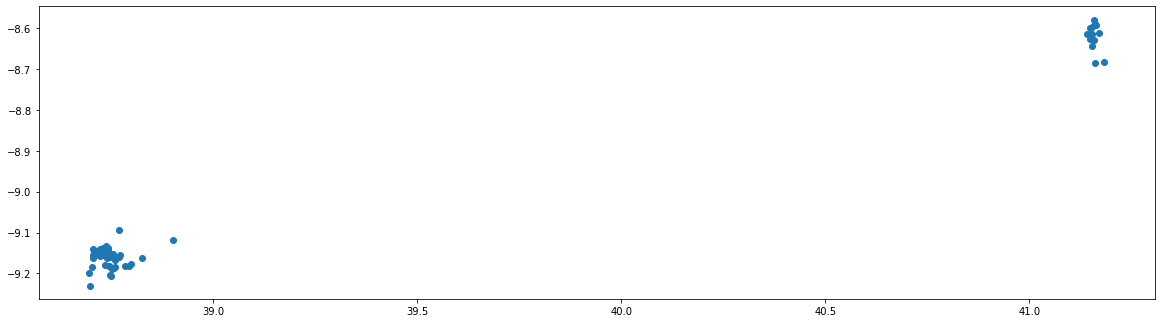

In [ ]:
# plotting graph using datavalues as well as porto and lisbon boundaries
fig, ax = plt.subplots(figsize = (20,20))
combined_geo_data.plot(ax=ax)

In [ ]:
correlation = combined_data.corr()#.drop(['POINT_X','POINT_Y'])
#correlation = correlation.drop( columns =['POINT_X','POINT_Y'])

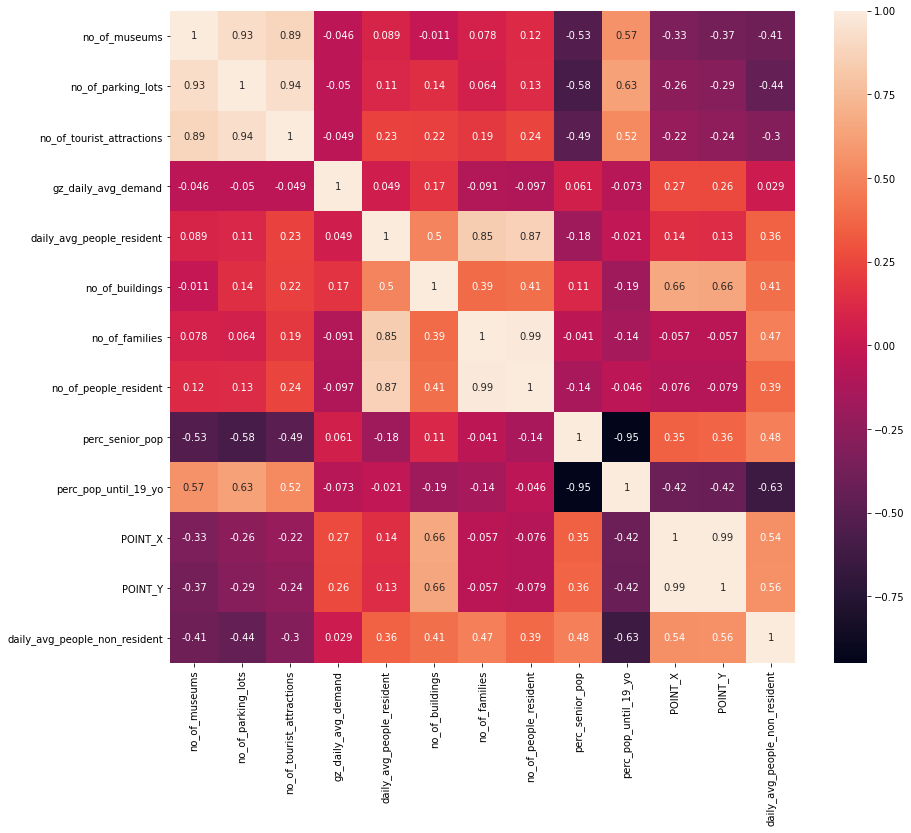

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation, annot = True )
plt.show()

In [ ]:
correlation['gz_daily_avg_demand'].sort_values(ascending = False)

gz_daily_avg_demand              1.000000
POINT_X                          0.267088
POINT_Y                          0.260458
no_of_buildings                  0.166726
perc_senior_pop                  0.061079
daily_avg_people_resident        0.049368
daily_avg_people_non_resident    0.029229
no_of_museums                   -0.046364
no_of_tourist_attractions       -0.048685
no_of_parking_lots              -0.049866
perc_pop_until_19_yo            -0.072523
no_of_families                  -0.090691
no_of_people_resident           -0.096994
Name: gz_daily_avg_demand, dtype: float64

### Findings and next steps
1. The correlation matrix shows that there are only few attributes with positive correlation

2. Seperate lisbon and porto data
3. We need to find other open datasets
4. Regression models can be applied

## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀